## 1. Загрузка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt
from math import ceil
import random

import torch
import torch.nn as nn

import warnings
warnings.filterwarnings("ignore")

In [ ]:
try :
    df = pd.read_csv('6_class.csv')
except:
    df = pd.read_csv('/datasets/6_class.csv')
df.head()


,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red


## 2. Исследовательский анализ

In [ ]:
df1 = df # перезапишет датасет в переменную df1, и далее будем работать с ним.
df1

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,237,8829,537493.000000,1423.0000,-10.73,5,White
238,238,9235,404940.000000,1112.0000,-11.23,5,White


Названия колонок длинные и неудобные для работы. Для удобства переименуем колонки.

In [ ]:
dict = {'Temperature (K)': 'temp', 'Luminosity(L/Lo)':'lum', 'Radius(R/Ro)':'rad', \
       'Absolute magnitude(Mv)':'mag', 'Star type':'type', 'Star color':'color'}
df1.rename(columns=dict, inplace=True)
df1

,Unnamed: 0,temp,lum,rad,mag,type,color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,237,8829,537493.000000,1423.0000,-10.73,5,White
238,238,9235,404940.000000,1112.0000,-11.23,5,White


In [ ]:
df1.isna().sum()

Unnamed: 0    0
temp          0
lum           0
rad           0
mag           0
type          0
color         0
dtype: int64

Незаполненных значений в датасете нет. С ним можно работать дальше. Ниже выведем статистические данные по датасету.

In [ ]:
df1.describe()

,Unnamed: 0,temp,lum,rad,mag,type
count,240.00000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,119.50000,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,69.42622,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,0.00000,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,59.75000,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,119.50000,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,179.25000,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,239.00000,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Столбец `Unnamed: 0` совпадает с индексами датасета и не несет никакой информационной составляющей, поэтому его можно удалить из датасета.

In [ ]:
df1 = df1.drop('Unnamed: 0', axis=1)

In [ ]:
df1.corr()

,temp,lum,rad,mag,type
temp,1.000000,0.393404,0.064216,-0.420261,0.411129
lum,0.393404,1.000000,0.526516,-0.692619,0.676845
rad,0.064216,0.526516,1.000000,-0.608728,0.660975
mag,-0.420261,-0.692619,-0.608728,1.000000,-0.955276
type,0.411129,0.676845,0.660975,-0.955276,1.000000


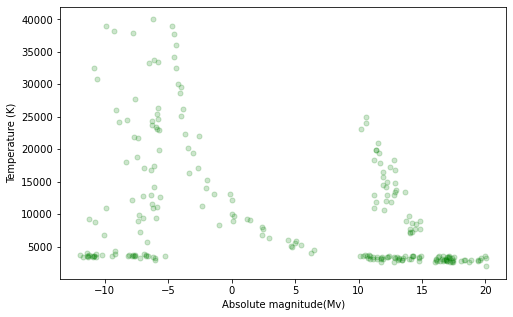

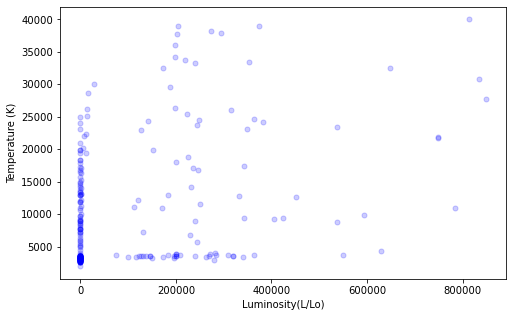

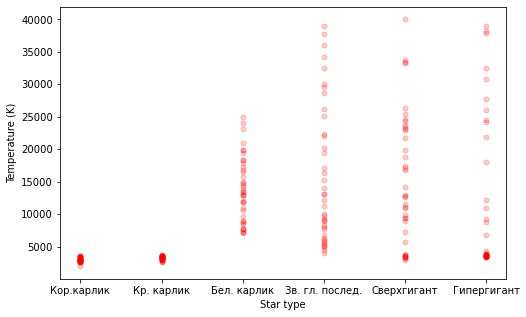

In [ ]:

plt.figure(figsize=(8,5))
plt.plot( df1['mag'], df1['temp'], linestyle='', marker='o', markersize=5, alpha=0.2, color="green")

# Titles
plt.xlabel('Absolute magnitude(Mv)')
plt.ylabel('Temperature (K)')
plt.title('', loc='left')
plt.show()

plt.figure(figsize=(8,5))
plt.plot( df1['lum'], df1['temp'], linestyle='', marker='o', markersize=5, alpha=0.2, color="blue")

# Titles
plt.xlabel('Luminosity(L/Lo)')
plt.ylabel('Temperature (K)')
plt.title('', loc='left')
plt.show()

plt.figure(figsize=(8,5))
plt.plot( df1['type'], df1['temp'], linestyle='', marker='o', markersize=5, alpha=0.2, color="red")

# Titles
list_types = ['Кор.карлик', 'Кр. карлик', 'Бел. карлик', 'Зв. гл. послед.', 'Cверхгигант', 'Гипергигант']
x_pos = np.arange(len(list_types))
plt.xticks(x_pos, list_types)
plt.xlabel('Star type')
plt.ylabel('Temperature (K)')
plt.title('', loc='left')
plt.show()

Из таблицы корреляции можно сделать вывод, что:
 - зависимость `Absolute magnitude(Mv)` от температуры носит скорее обратнопропорциональный характер
 - зависимость `Luminosity(L/Lo)` от температуры склонна к прямопропорциональной зависимости

По зависимости от типа звезды можно сделать вывод, что:
 - Коричневые и красные карлики имеют относительно невысокую температу ниже 5000К,
 - Белые карлики имеют температуру в диапазоне приблизительно от 7000 до 25000К,
 - Звезды главной последовательности, сверхгиганты и гипергиганты имеют примерно одинаковый и очень большой разброс по значениям температуры от 2500 до 40000 К.



<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Угу, отличное исследование, согласен </div>

array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

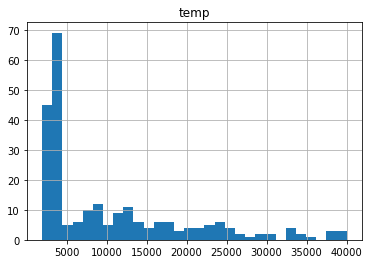

In [ ]:
df1.hist('temp', bins = 30)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab88ec4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab88ece80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab0bc6220>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab0c205b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab0c20ca0>],
 'means': []}

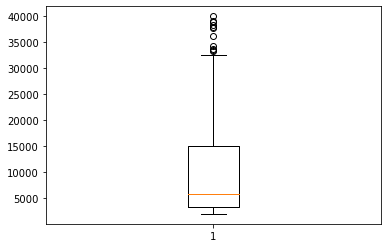

In [ ]:
plt.boxplot(df1['temp'])

array([[<AxesSubplot:title={'center':'lum'}>]], dtype=object)

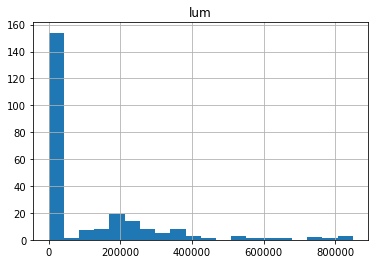

In [ ]:
df1.hist('lum', bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab0d2adc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab0d39520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab0d2aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab0d39c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab0d39fd0>],
 'means': []}

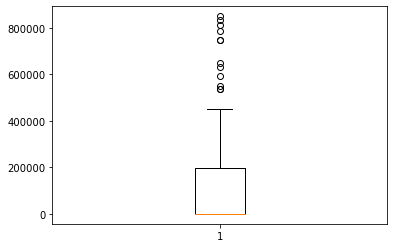

In [ ]:
plt.boxplot(df1['lum'])

(451900.0, 452050.0)

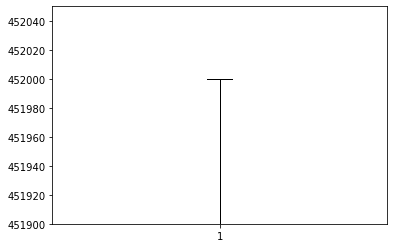

In [ ]:
plt.boxplot(df1['lum'])
plt.ylim(451900, 452050)

По относительной светимости датасет имеет выбросы. Найдем индексы строк, в который отн. светимость больше значения 452000 и сохраним эти значения в список.

In [ ]:
df1.loc[df1['lum']>452000]


,temp,lum,rad,mag,type,color
53,3749,550000.0,1648.0,-8.050,5,Orange
101,40000,813000.0,14.0,-6.230,4,Blue
172,4287,630000.0,1315.0,-9.200,5,Orange
223,23440,537430.0,81.0,-5.975,4,Blue
226,9892,593900.0,80.0,-7.262,4,Blue
227,10930,783930.0,25.0,-6.224,4,Blue
229,21738,748890.0,92.0,-7.346,4,Blue
232,32489,648430.0,1948.5,-10.840,5,Blue
233,27739,849420.0,1252.0,-7.590,5,Blue-white
234,21904,748490.0,1130.0,-7.670,5,Blue-white


In [ ]:
index_del = (df1.loc[df1['lum']>452000]).index.to_list()
len(index_del)

12

array([[<AxesSubplot:title={'center':'rad'}>]], dtype=object)

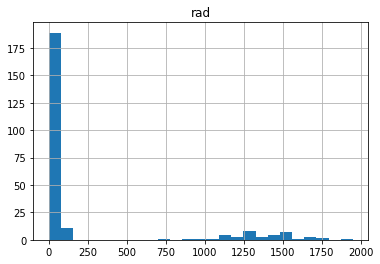

In [ ]:
df1.hist('rad', bins=25)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab8fee760>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab8feee80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab8fee3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab8ffa5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab8ffa970>],
 'means': []}

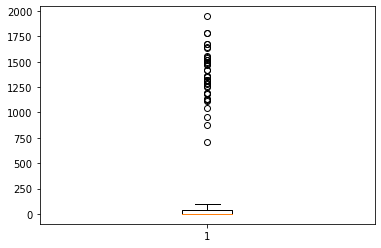

In [ ]:
plt.boxplot(df1['rad'])

(0.0, 100.0)

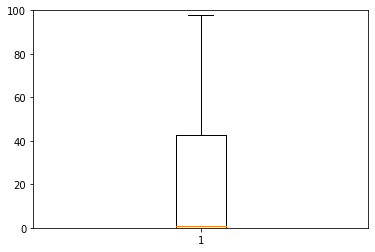

In [ ]:
plt.boxplot(df1['rad'])
plt.ylim(0,100)

По относительному радиусу датасет имеет выбросы, так же их определим номера строк и сохраним в список.

In [ ]:
index_del1 = (df1.loc[df1['rad']>100]).index.to_list()
len(index_del1)

40

In [ ]:
index_del.extend(index_del1)
len(index_del)

52

array([[<AxesSubplot:title={'center':'mag'}>]], dtype=object)

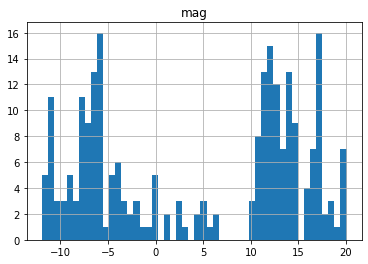

In [ ]:
df1.hist('mag', bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eab91a2340>,
 'caps': [<matplotlib.lines.Line2D at 0x1eab91a2a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eab9194fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eab91ae1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eab91ae580>],
 'means': []}

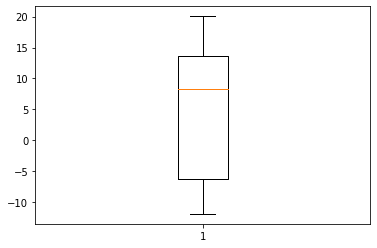

In [ ]:
plt.boxplot(df1['mag'])

(20.0, 20.2)

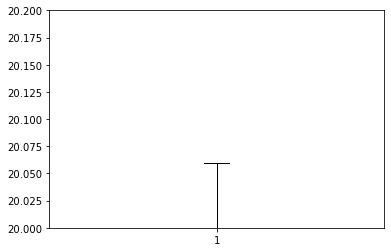

In [ ]:
plt.boxplot(df1['mag'])
plt.ylim(20, 20.2)

In [ ]:
df1.loc[df1['mag']>20]

,temp,lum,rad,mag,type,color
4,1939,0.000138,0.103,20.06,0,Red
122,3218,0.000540,0.110,20.02,0,Red


In [ ]:
index_del1 = (df1.loc[df1['mag']>20]).index.to_list()
len(index_del1)

2

Магнитуда также содержит выбросы в данных.

In [ ]:
index_del.extend(index_del1)
len(index_del)

54

(-13.0, -11.0)

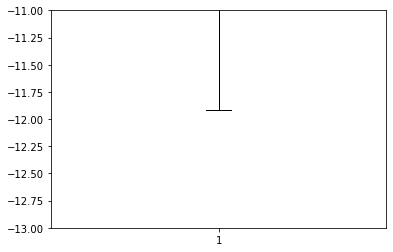

In [ ]:
plt.boxplot(df1['mag'])
plt.ylim(-13,-11)

In [ ]:
df1.loc[df1['mag']<-12]

,temp,lum,rad,mag,type,color


In [ ]:
df1.head()

,temp,lum,rad,mag,type,color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


In [ ]:
df1['color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

Значение `Blue-white` записано в датасете несколькими способами ('Blue White', 'Blue white', 'Blue white ', 'Blue-White'), то же самое справедливо для `White`('white', 'Whitish'), `Yellow`('Yellowish White', 'yellow-white', 'White-Yellow','yellowish', 'Yellowish'), `Orange`('Pale yellow orange', 'Orange-Red').

Ниже будет реализована функция, которая все значения указанные в скобках выше, будет заменять на одно значение перед скобкой.


In [ ]:
df1['color'].nunique()

19

In [ ]:
df1['color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: color, dtype: int64

In [ ]:
list_bw = ['Blue White', 'Blue white', 'Blue white ', 'Blue-White']
list_b = ['Blue ']
list_w = ['white', 'Whitish']
list_y = ['Yellowish White', 'yellow-white', 'White-Yellow','yellowish', 'Yellowish']
list_o = ['Pale yellow orange', 'Orange-Red']

list_input = [list_bw, list_b,  list_w, list_y, list_o]

list_final = ['Blue-white','Blue', 'White','Yellow', 'Orange']

def group_color(list_, color):
    for i in list_:
        df1.loc[df1['color']==i, 'color'] = color

for i, j in zip(list_input, list_final):
    group_color(i,j)



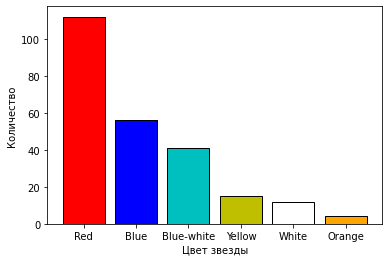

In [ ]:
list_colors = df1['color'].value_counts().index.values.tolist()
list_counts = df1['color'].value_counts().to_list()

x_pos = np.arange(len(list_colors))


plt.bar(x_pos, list_counts, color=['r','b','c','y','w','orange'], edgecolor='black')


plt.xticks(x_pos, list_colors)
plt.xlabel('Цвет звезды')
plt.ylabel('Количество')
plt.show()

В датасете преобладают красные звезды за ними  по количеству идут звезды синего и голубого цвета.

Воспользуемся порядковым кодировщиком, чтобы проанализировать зависимость цвета звезды от ее температуры. Перевед цвет звезды в датасете в порядковый номер( подобным образом у нас изначально закодирован столбец `type` в датасете.

In [ ]:
df1
enc_ord = OrdinalEncoder()
enc_ord.fit(df1[['color']])
df1[['color_num']] = enc_ord.transform(df1[['color']])

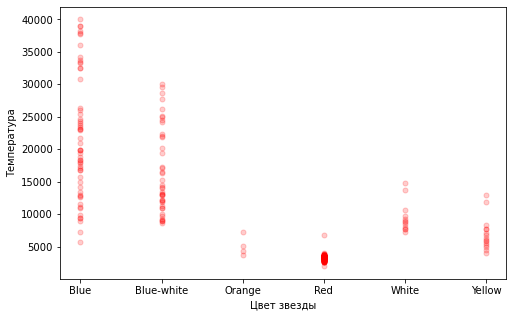

In [ ]:
plt.figure(figsize=(8,5))
plt.plot( df1['color_num'], df1['temp'], linestyle='', marker='o', markersize=5, alpha=0.2, color="red")

# Titles
list_colors = enc_ord.categories_[0]
x_pos = np.arange(len(list_colors))
plt.xticks(x_pos, list_colors)
plt.xlabel('Цвет звезды')
plt.ylabel('Температура')
plt.title('', loc='left')
plt.show()

По цвету звезды можно сделать следующие выводы:
 - оранжевые, красные, желтые и белые звезды имеют относительно других более низкие температуры. Для оранжевых и красных типична температура в диапазоне примерно от 2500 до 7500К,  для желтых от 2500 до 12500К, для белых от 7500 до 15000К.
 - синие и голубые звезды обладают более высокой температурой относительно других звезд. Для синих характерна температура в диапазоне  от 5000 до 40000К, голубые звезды немного холоднее синих и обладают температурой в диапазоне от 7500 до 30000 К.

In [ ]:
df1['type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: type, dtype: int64

В датасете присутсвуют по 40 представителей звезд каждого типа.

## Вывод

Из таблицы корреляции можно сделать вывод, что:
 - зависимость `Absolute magnitude(Mv)` от температуры носит скорее обратнопропорциональный характер
 - зависимость `Luminosity(L/Lo)` от температуры склонна к прямопропорциональной зависимости

По зависимости от типа звезды можно сделать вывод, что:
 - Коричневые и красные карлики имеют относительно невысокую температу ниже 5000К,
 - Белые карлики имеют температуру в диапазоне приблизительно от 7000 до 25000К,
 - Звезды главной последовательности, сверхгиганты и гипергиганты имеют примерно одинаковый и очень большой разброс по значениям температуры от 2500 до 40000 К.


 - В датасете преобладают красные звезды за ними  по количеству идут звезды синего и голубого цвета.

 - В датасете присутсвуют по 40 представителей звезд каждого типа.



   По цвету звезды можно сделать следующие выводы:
 - оранжевые, красные, желтые и белые звезды имеют относительно других более низкие температуры. Для оранжевых и красных типична температура в диапазоне примерно от 2500 до 7500К,  для желтых от 2500 до 12500К, для белых от 7500 до 15000К.
 - синие и голубые звезды обладают более высокой температурой относительно других звезд. Для синих характерна температура в диапазоне  от 5000 до 40000К, голубые звезды немного холоднее синих и обладают температурой в диапазоне от 7500 до 30000 К.


## 3. Подготовка данных к построению модели

In [ ]:
len(index_del)*100/len(df)

22.5

In [ ]:
#df1 = df1.drop(index = index_del) оставляем весь первоначальный датасет
df1 = df1.drop('color_num', axis=1) # удаляем вспомогательный столбец
df1

,temp,lum,rad,mag,type,color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,8829,537493.000000,1423.0000,-10.73,5,White
238,9235,404940.000000,1112.0000,-11.23,5,White


Для категориальных переменных `color` и `type` используем `OneHotEncoder` и предварительно написанную функцию, на вход которой поступает название выборки и название столбца, который нужно закодировать. На выходе получаем датасет, в котором категориальные значения становятся названиями столбцов, а первоначальный столбец(`color`, `type`) удаляется из датасета.

In [ ]:
def ohe_trans(df, column):
    ohe = OneHotEncoder(handle_unknown='error').fit(df[[column]])
    ohe_cat = ohe.categories_
    df2 = pd.DataFrame(ohe.transform(df[[column]]).toarray(), \
                   columns = ohe_cat[0],\
                   index = df[column].index)
    df = df.join(df2)
    df = df.drop(column, axis=1)
    return df

In [ ]:
list_columns = ['color', 'type']
for i in list_columns:
    df1 = ohe_trans(df1, i)
df1.head()

,temp,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
0,3068,0.002400,0.1700,16.12,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3042,0.000500,0.1542,16.60,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2600,0.000300,0.1020,18.70,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2800,0.000200,0.1600,16.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1939,0.000138,0.1030,20.06,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Разобьем данные на обучающую  - `train`, валидационную  - `valid` и тестовую выборки  - `test` в пропорции 60:20:20

In [ ]:
target = df1['temp']
features = df1.drop('temp', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
                            features, target, test_size=0.4, random_state=1234, shuffle=True)


features_valid, features_test, target_valid, target_test = train_test_split(
                            features_valid, target_valid, test_size=0.5, random_state=1234)



list_ = [features_train, features_valid, features_test,]
list__ = ['features_train', 'features_valid', 'features_test']


list_target = [target_train, target_valid, target_test]
list__target=['target_train','target_valid', 'target_test']

for i,j in zip(list_, list__):
    print('Размерность ',j, end='\t')
    print(i.shape)

print()

for i,j in zip(list_target, list__target):
    print('Размерность ',j, end='\t')
    print(i.shape)



Размерность  features_train	(144, 15)
Размерность  features_valid	(48, 15)
Размерность  features_test	(48, 15)

Размерность  target_train	(144,)
Размерность  target_valid	(48,)
Размерность  target_test	(48,)


Далее проведем масштабирование количественных переменных в тренировочных данных при помощи кодировщика StandardScaler.


In [ ]:
numeric = ['lum', 'rad', 'mag']

scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

display(features_train.head())
display(features_valid.head())
display(features_test.head())

,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
99,0.537260,-0.439641,-0.901141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
229,3.560180,-0.288009,-1.183853,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49,0.657982,-0.410353,-1.064281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
225,0.684211,-0.373279,-1.193833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83,-0.549233,-0.458521,0.715867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
106,1.442671,-0.341766,-1.038370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162,1.931044,-0.304693,-1.018218,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.549233,-0.458313,1.173619,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39,-0.549229,-0.456714,0.003808,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
236,4.027438,1.754754,-1.499002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
40,0.548235,-0.423329,-1.143932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,-0.549233,-0.458185,0.788800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,-0.549233,-0.458528,0.626620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,-0.549233,-0.457297,0.939081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59,0.520798,2.407252,-1.569056,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
features_train.head()

,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
99,0.537260,-0.439641,-0.901141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
229,3.560180,-0.288009,-1.183853,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
49,0.657982,-0.410353,-1.064281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
225,0.684211,-0.373279,-1.193833,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83,-0.549233,-0.458521,0.715867,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
features_valid.head()

,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
106,1.442671,-0.341766,-1.038370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
162,1.931044,-0.304693,-1.018218,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,-0.549233,-0.458313,1.173619,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
39,-0.549229,-0.456714,0.003808,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
236,4.027438,1.754754,-1.499002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
features_test.head()

,lum,rad,mag,Blue,Blue-white,Orange,Red,White,Yellow,0,1,2,3,4,5
40,0.548235,-0.423329,-1.143932,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,-0.549233,-0.458185,0.788800,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
141,-0.549233,-0.458528,0.626620,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199,-0.549233,-0.457297,0.939081,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59,0.520798,2.407252,-1.569056,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 4. Построение простой модели нейронной сети - baseline

Создадим нейронную сеть с двумя скрытыми слоями и количеством нейронов в них 10 на первом скрытом слое и 4 на втором скрытом слое. Функции активации выберем TanH() - ReLU() - ReLU(). Предварительно были опробованы разные комбинации функций активации, но сочетание TanH() - ReLU() - ReLU() дало наименьшую метрику RMSE.

In [ ]:

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)

n_in_neurons = len(features_train.columns)
n_hidden_neurons_1 = 8
n_hidden_neurons_2 = 4
n_out_neurons = 1

X_train = torch.Tensor(features_train.values)
X_valid = torch.Tensor(features_valid.values)
X_test = torch.Tensor(features_test.values)

y_train = torch.Tensor(target_train.values)
y_valid = torch.Tensor(target_valid.values)
y_test = torch.Tensor(target_test.values)



net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),

    nn.BatchNorm1d(n_hidden_neurons_1),
    #nn.Dropout(p=0.1),
    nn.Tanh(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),

    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons),


)


optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss =  nn.MSELoss()


RMSE_min = 100000
epoch_min = 0

num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net.forward(X_train).flatten()
    loss_value = (loss(preds, y_train))
    loss_value1 = sqrt(loss_value.detach().numpy())
    loss_value.backward()
    optimizer.step()
    if epoch % 1000 == 0 or epoch == num_epochs - 1:
        net.eval()
        valid_preds = net.forward(X_valid)
        RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
        if RMSE <= RMSE_min:
            RMSE_min = RMSE
            epoch_min = epoch
        print('RMSE = ', RMSE,'\tloss_value = ', loss_value1,   '\tepoch = ', epoch)
print()
print('RMSE_min = ', RMSE_min, '\tepoch_min = ',epoch_min)




RMSE =  13021.235016524377 	loss_value =  14174.529833472432 	epoch =  0
RMSE =  12877.22315370965 	loss_value =  14030.072273513062 	epoch =  1000
RMSE =  12251.924224648075 	loss_value =  13399.63641297778 	epoch =  2000
RMSE =  11128.64846220329 	loss_value =  12254.77931257842 	epoch =  3000
RMSE =  9747.360969415045 	loss_value =  10810.487870581976 	epoch =  4000
RMSE =  8160.9372381020785 	loss_value =  9115.570854312966 	epoch =  5000
RMSE =  6431.296862453403 	loss_value =  7240.308280729489 	epoch =  6000
RMSE =  5186.870949372372 	loss_value =  5718.629206374549 	epoch =  7000
RMSE =  4604.123714203941 	loss_value =  4479.130495977986 	epoch =  8000
RMSE =  4909.260711344689 	loss_value =  3724.9938254982385 	epoch =  9000
RMSE =  5017.42152795069 	loss_value =  2867.0745543149033 	epoch =  9999

RMSE_min =  4604.123714203941 	epoch_min =  8000


In [ ]:
preds1 = valid_preds.detach().numpy().flatten()
preds1 = pd.DataFrame(preds1, index = target_valid.index, columns = ['preds'])
preds1 = preds1.join(target_valid)
preds1 = preds1.iloc[0:19]
preds1.index

Int64Index([106, 162,   6,  39, 236, 111,  73, 187, 163, 126, 144,  17,  58,
            176, 130, 134,  51, 148, 146],
           dtype='int64')

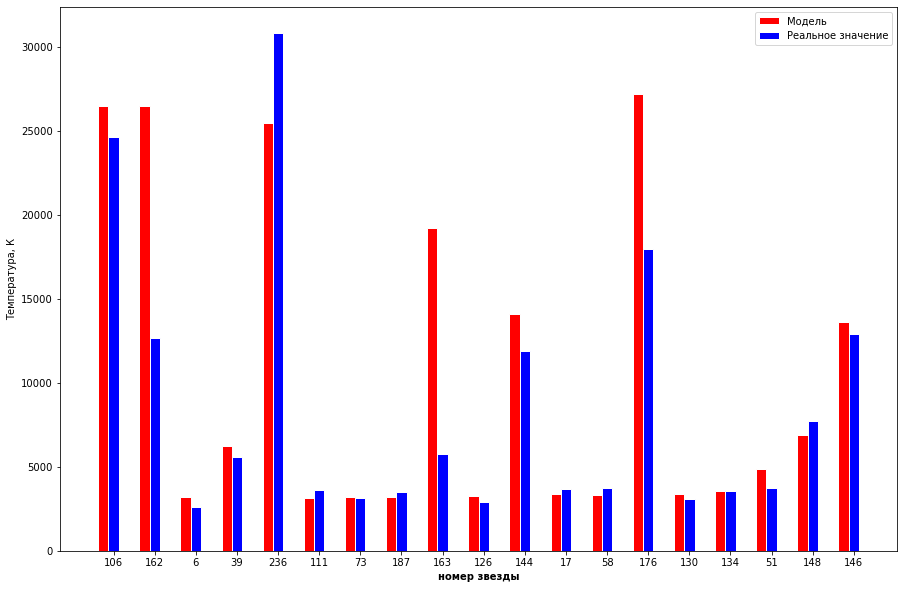

In [ ]:


# set width of bars
barWidth = 0.25

# set heights of bars
bars1 = preds1['preds']
bars2 = preds1['temp']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
#plt.subplot (1, 1, 1)
plt.figure(figsize=(15,10))
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='preds')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='real')


# Add xticks on the middle of the group bars
plt.xlabel('номер звезды', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], preds1.index)

# Create legend & Show graphic
plt.legend(['Модель', 'Реальное значение'])
plt.ylabel('Температура, К')
plt.show()



## Улучшение нейронной сети

Далее будем улучшать нашу нейронную сеть. Для получения минимально возможной метрики RMSE. Ниже написана функция, на вход которой подаются значения

n1 - количество нейронов на первом скрытом слое,

n2 - количество нейронов на втором скрытом слое,

batch - размер батча,

dropout_1 - процент выключенных нейронов на первом скрытом слое,

dropout_2  - процент выключенных нейронов на втором скрытом слое.

На выходе этой функции будем получать значение RMSE.

In [ ]:
def search_num_neur(n1,n2):
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.use_deterministic_algorithms(True)

    n_in_neurons = len(features_train.columns)
    n_hidden_neurons_1 = n1
    n_hidden_neurons_2 = n2
    n_out_neurons = 1

    X_train = torch.Tensor(features_train.values)
    X_valid = torch.Tensor(features_valid.values)
    X_test = torch.Tensor(features_test.values)

    y_train = torch.Tensor(target_train.values)
    y_valid = torch.Tensor(target_valid.values)
    y_test = torch.Tensor(target_test.values)



    net = nn.Sequential(
        nn.Linear(n_in_neurons, n_hidden_neurons_1),
        nn.BatchNorm1d(n_hidden_neurons_1),
        nn.Tanh(),
        nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
        nn.BatchNorm1d(n_hidden_neurons_2),
        nn.ReLU(),
        nn.Linear(n_hidden_neurons_2, n_out_neurons),


)

    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    loss = nn.MSELoss()

    RMSE_min = 100000
    epoch_min = 0

    num_epochs = 4000
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = net.forward(X_train).flatten()
        loss_value = loss(preds, y_train)
        loss_value.backward()
        optimizer.step()
        if epoch % 100 == 0 or epoch == num_epochs - 1:
            net.eval()
            valid_preds = net.forward(X_valid)
            RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
            if RMSE <= RMSE_min:
                RMSE_min = RMSE
                epoch_min = epoch
            #print('RMSE = ', RMSE, '\tepoch = ', epoch)
    #print()
    #print('RMSE_min = ', RMSE_min, '\tepoch_min = ',epoch_min)

    return RMSE

In [ ]:
RMSE_min = 100000
i_min  = 0
j_min = 0
for i in range(2, 66, 2):

    print(i, end='\t')
    for j in range(2, 66 , 2):
        print(j, end='\t')


        RMSE = search_num_neur(i, j)
        if RMSE <= RMSE_min:
            RMSE_min = RMSE
            i_min = i
            j_min = j
    print()
    print('RMSE = ', RMSE, '\t RMSE_min = ', RMSE_min, '\t при n1=', i_min, '\t n2=', j_min)
print(i_min)
print(j_min)

2	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  4719.014784372233 	 RMSE_min =  4688.985353009504 	 при n1= 2 	 n2= 62
4	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  5002.992730789202 	 RMSE_min =  4640.864425464382 	 при n1= 4 	 n2= 36
6	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  5163.952431455248 	 RMSE_min =  4518.029046434394 	 при n1= 6 	 n2= 50
8	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  4867.993412381229 	 RMSE_min =  4518.029046434394 	 при n1= 6 	 n2= 50
10	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  5475.540946093731 	 RMSE_min =  4518.029046434394 	 при n1= 6 	 n2= 50
12	2	4	6	8	10	12	14	16	18	20	22	24	26	28	30	32	34	36	38	40	42	44	46	48	50	52	54	56	58	60	62	64	
RMSE =  5529.524291314282 	 RMSE_

In [ ]:

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)

n_in_neurons = len(features_train.columns)
n_hidden_neurons_1 = 18
n_hidden_neurons_2 = 24
n_out_neurons = 1

X_train = torch.Tensor(features_train.values)
X_valid = torch.Tensor(features_valid.values)
X_test = torch.Tensor(features_test.values)

y_train = torch.Tensor(target_train.values)
y_valid = torch.Tensor(target_valid.values)
y_test = torch.Tensor(target_test.values)



net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),

    nn.BatchNorm1d(n_hidden_neurons_1),
    #nn.Dropout(p=0.1),
    nn.Tanh(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),

    nn.BatchNorm1d(n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons),


)


optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss =  nn.MSELoss()


RMSE_min = 100000
epoch_min = 0

num_epochs = 3991
for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net.forward(X_train).flatten()
    loss_value = (loss(preds, y_train))
    loss_value1 = sqrt(loss_value.detach().numpy())
    loss_value.backward()
    optimizer.step()
    if epoch % 1000 == 0 or epoch == num_epochs - 1:
        net.eval()
        valid_preds = net.forward(X_valid)
        RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
        if RMSE <= RMSE_min:
            RMSE_min = RMSE
            epoch_min = epoch
        print('RMSE = ', RMSE,'\tloss_value = ', loss_value1,   '\tepoch = ', epoch)
print()
print('RMSE_min = ', RMSE_min, '\tepoch_min = ',epoch_min)

RMSE =  13021.520771265383 	loss_value =  14174.998835978788 	epoch =  0
RMSE =  11724.478547227116 	loss_value =  12866.348666191197 	epoch =  1000
RMSE =  8185.000627601605 	loss_value =  9106.711371290956 	epoch =  2000
RMSE =  4797.4130078998505 	loss_value =  5177.526629579031 	epoch =  3000
RMSE =  4456.326861314998 	loss_value =  3487.163317081665 	epoch =  3990

RMSE_min =  4456.326861314998 	epoch_min =  3990


In [ ]:
def search_batch_size(batch):
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.use_deterministic_algorithms(True)

    n_in_neurons = len(features_train.columns)
    n_hidden_neurons_1 = 18
    n_hidden_neurons_2 = 24
    n_out_neurons = 1

    X_train = torch.Tensor(features_train.values)
    X_valid = torch.Tensor(features_valid.values)
    y_train = torch.Tensor(target_train.values)
    y_valid = torch.Tensor(target_valid.values)


    net = nn.Sequential(
        nn.Linear(n_in_neurons, n_hidden_neurons_1),

        nn.BatchNorm1d(n_hidden_neurons_1),
        #nn.Dropout(p=0.1),
        nn.Tanh(),
        nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),

        nn.BatchNorm1d(n_hidden_neurons_2),
        nn.ReLU(),
        nn.Linear(n_hidden_neurons_2, n_out_neurons),
                      )

    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

    loss = nn.MSELoss()

    batch_size = batch

    RMSE_min = 20000

    num_epochs = 10000

    num_batches = ceil(len(X_train)/batch_size)

    for epoch in range(num_epochs):
        # случайная перестановка объектов
        order = np.random.permutation(len(X_train))
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()

        # получение индексов текущего батча
            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        if epoch % 1000 == 0 or epoch == num_epochs - 1:
            net.eval()
            valid_preds = net.forward(X_valid)
            RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
            if RMSE <= RMSE_min:
                RMSE_min = RMSE

    return RMSE_min

In [ ]:
for batch in range(10, len(features_train), 10):
    RMSE = search_batch_size(batch)
    print('RMSE = ', RMSE, '\tbatch = ', batch)

RMSE =  7945.320723057593 	batch =  10
RMSE =  8258.220034931905 	batch =  20
RMSE =  8642.386088725301 	batch =  30
RMSE =  8707.734065479865 	batch =  40
RMSE =  8773.402967956614 	batch =  50
RMSE =  8759.106149542167 	batch =  60
RMSE =  8246.305761302774 	batch =  70
RMSE =  8825.870243963018 	batch =  80
RMSE =  8827.410819436082 	batch =  90
RMSE =  8817.715274294307 	batch =  100
RMSE =  8799.008426275019 	batch =  110
RMSE =  8773.675406103546 	batch =  120
RMSE =  8659.664274736326 	batch =  130
RMSE =  8012.383769057678 	batch =  140


Для начала найдем количество нейронов в скрытых слоях, которые дадут минимально возможное значение RMSE. Для этого размер батча зафиксируем, а будем менять количество нейронов в скрытых слоях.
Используем два цикла вложенных один в другой найдем оптимальные значения n1, n2. Ячейка с кодом ниже выполнялась 4 часа.
RMSE_min = 4456 при значениях n1 = 18, n2 = 24.

In [ ]:
def search_drop_out(drop_out1, drop_out2):
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.use_deterministic_algorithms(True)

    n_in_neurons = len(features_train.columns)
    n_hidden_neurons_1 = 18
    n_hidden_neurons_2 = 24
    n_out_neurons = 1

    X_train = torch.Tensor(features_train.values)
    X_valid = torch.Tensor(features_valid.values)
    y_train = torch.Tensor(target_train.values)
    y_valid = torch.Tensor(target_valid.values)



    net = nn.Sequential(
        nn.Linear(n_in_neurons, n_hidden_neurons_1),
        nn.Tanh(),
        nn.Dropout(p=drop_out1),
        nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
        nn.ReLU(),
        nn.Dropout(p=drop_out2),
        nn.Linear(n_hidden_neurons_2, n_out_neurons),
        nn.ReLU()
                    )

    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    loss = nn.MSELoss()

    RMSE_min = 100000
    epoch_min = 0

    num_epochs = 6000
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = net.forward(X_train).flatten()
        loss_value = loss(preds, y_train)
        loss_value.backward()
        optimizer.step()
        if epoch % 100 == 0 or epoch == num_epochs - 1:
            net.eval()
            valid_preds = net.forward(X_valid)
            RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
            if RMSE <= RMSE_min:
                RMSE_min = RMSE
                epoch_min = epoch
    return RMSE_min

In [ ]:
RMSE_min = 20000
drop_1_min = 10
for drop_1 in np.arange(0, 1., 0.1):

   #print('RMSE = ' , RMSE,'drop_1 = ',drop_1)
    RMSE = search_drop_out(drop_1 , 0)
    if RMSE <= RMSE_min:
        RMSE_min = RMSE
        drop_1_min = drop_1
    print('RMSE = ' , RMSE,'drop_1 = ',drop_1)
print('RMSE_min = ', RMSE_min, 'drop_1_min = ', drop_1_min)

RMSE =  13021.37929185249 drop_1 =  0.0
RMSE =  6557.338652030737 drop_1 =  0.1
RMSE =  6552.879859061411 drop_1 =  0.2
RMSE =  6550.492540608062 drop_1 =  0.30000000000000004
RMSE =  6551.0855893362 drop_1 =  0.4
RMSE =  6553.4415697929735 drop_1 =  0.5
RMSE =  6552.642185008212 drop_1 =  0.6000000000000001
RMSE =  6552.932916062429 drop_1 =  0.7000000000000001
RMSE =  6874.478346424473 drop_1 =  0.8
RMSE =  6874.458088791991 drop_1 =  0.9
RMSE_min =  6550.492540608062 drop_1_min =  0.30000000000000004


In [ ]:
RMSE_min = 20000
drop_2_min = 10
for drop_2 in np.arange(0, 1., 0.1):

   #print('RMSE = ' , RMSE,'drop_1 = ',drop_1)
    RMSE = search_drop_out(0.1 , drop_2)
    if RMSE <= RMSE_min:
        RMSE_min = RMSE
        drop_2_min = drop_2
    print('RMSE = ' , RMSE,'\tdrop_2 = ',drop_2)
print('RMSE_min = ', RMSE_min, '\tdrop_2_min = ', drop_2_min)

RMSE =  6557.338652030737 	drop_2 =  0.0
RMSE =  6553.095646463644 	drop_2 =  0.1
RMSE =  6552.893305569353 	drop_2 =  0.2
RMSE =  6551.27062639348 	drop_2 =  0.30000000000000004
RMSE =  6557.163911563127 	drop_2 =  0.4
RMSE =  6556.9547164905025 	drop_2 =  0.5
RMSE =  6556.62160971869 	drop_2 =  0.6000000000000001
RMSE =  6558.155666263032 	drop_2 =  0.7000000000000001
RMSE =  6556.940811610851 	drop_2 =  0.8
RMSE =  6558.8636124951 	drop_2 =  0.9
RMSE_min =  6551.27062639348 	drop_2_min =  0.30000000000000004


In [ ]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)

n_in_neurons = len(features_train.columns)
n_hidden_neurons_1 = 18
n_hidden_neurons_2 = 24
n_out_neurons = 1

X_train = torch.Tensor(features_train.values)
X_valid = torch.Tensor(features_valid.values)
X_test = torch.Tensor(features_test.values)

y_train = torch.Tensor(target_train.values)
y_valid = torch.Tensor(target_valid.values)
y_test = torch.Tensor(target_test.values)



net = nn.Sequential(
        nn.Linear(n_in_neurons, n_hidden_neurons_1),

        nn.BatchNorm1d(n_hidden_neurons_1),
        #nn.Dropout(p=0.1),
        nn.Tanh(),
        nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),

        nn.BatchNorm1d(n_hidden_neurons_2),
        nn.ReLU(),
        nn.Linear(n_hidden_neurons_2, n_out_neurons),
                    )

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss = nn.MSELoss()

RMSE_min = 100000
epoch_min = 0

num_epochs = 3991
for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net.forward(X_train).flatten()
    loss_value = loss(preds, y_train)
    loss_value.backward()
    optimizer.step()
    if epoch % 1000 == 0 or epoch == num_epochs - 1:
        net.eval()
        valid_preds = net.forward(X_valid)
        RMSE = sqrt(mean_squared_error(target_valid, valid_preds.detach().numpy()) )
        if RMSE <= RMSE_min:
            RMSE_min = RMSE
            epoch_min = epoch

        print('RMSE = ', RMSE, '\tepoch = ', epoch)
print()
print('RMSE_min = ', RMSE_min, '\tepoch_min = ',epoch_min)


test_preds = net.forward(X_test)
RMSE_test = sqrt(mean_squared_error(target_test, test_preds.detach().numpy()) )
print('RMSE_test = ', RMSE_test)

RMSE =  13021.520771265383 	epoch =  0
RMSE =  11724.478547227116 	epoch =  1000
RMSE =  8185.000627601605 	epoch =  2000
RMSE =  4797.4130078998505 	epoch =  3000
RMSE =  4456.326861314998 	epoch =  3990

RMSE_min =  4456.326861314998 	epoch_min =  3990
RMSE_test =  5541.240470226502


In [ ]:
preds2 = valid_preds.detach().numpy().flatten()
preds2 = pd.DataFrame(preds2, index = target_valid.index, columns = ['preds'])
preds2 = preds2.join(target_valid)
preds2 = preds2.iloc[0:19]
preds2.index

Int64Index([106, 162,   6,  39, 236, 111,  73, 187, 163, 126, 144,  17,  58,
            176, 130, 134,  51, 148, 146],
           dtype='int64')

## Выводы

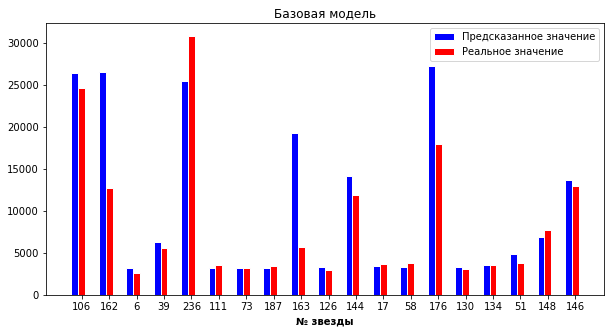

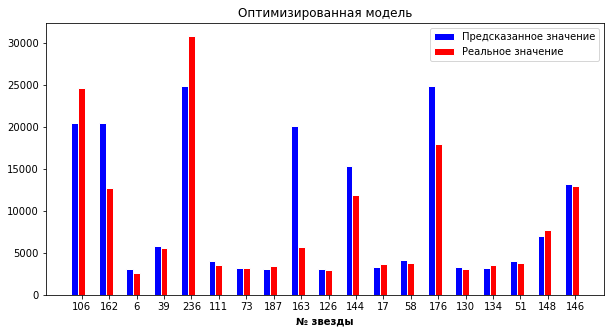

In [ ]:

# set width of bars
barWidth = 0.25

# set heights of bars
bars1 = preds1['preds']
bars2 = preds1['temp']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]



# Make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='preds')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='real')


# Add xticks on the middle of the group bars
plt.title('Базовая модель')
plt.xlabel('№ звезды', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], preds1.index)

# Create legend & Show graphic
plt.legend(['Предсказанное значение', 'Реальное значение'])
plt.show()

####################################################
# set width of bars
barWidth = 0.25

# set heights of bars
bars1 = preds2['preds']
bars2 = preds2['temp']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.figure(figsize=(10,5))
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='preds')
plt.bar(r2, bars2, color='r', width=barWidth, edgecolor='white', label='real')


# Add xticks on the middle of the group bars
plt.title('Оптимизированная модель')
plt.xlabel('№ звезды', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], preds2.index)

# Create legend & Show graphic
plt.legend(['Предсказанное значение', 'Реальное значение'])
plt.show()

# Вывод

В данном проекте в качестве модели была использована нейронная сеть имеющая два скрытых слоя. Далее сеть оптимизировалась по метрике RMSE. На первом этапе было найдено оптимальное количество нейронов на первом и втором скрытых слоях, на втором этапе в качестве параметра использовался размер батча, на третьем была использована регуляризация методом `dropout`.
Улучшение метрики было после оптимизации количества нейронов , размера батча и метод `dropout` улучшения не принес.
Базовая модель имела RMSE = 4604, после оптимизации удалось снизить это значение до 4456. На тестовых данных была достигнута метрика 5541.